<a href="https://colab.research.google.com/github/NileeshaDM/Google-Colabs/blob/main/Polynomial_Regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

np.random.seed(0)
x = 1+2*np.random.normal(0, 1, 1000) #random data (mean, sd, no.of data)
y = x+1.5*(x**2)+0.8*(x**3)+np.random.normal(0 ,3, 1000)

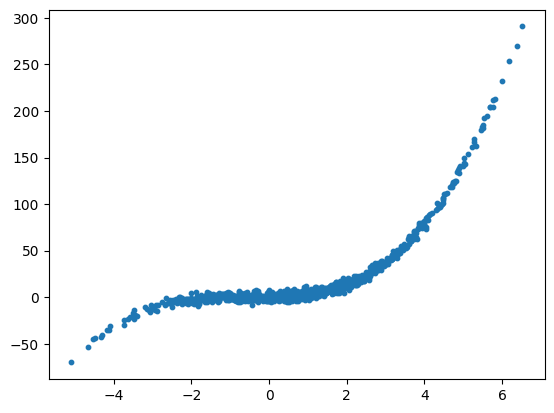

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s=10)
plt.show()

Split Dataset into 3 sets

In [3]:
from sklearn.model_selection import train_test_split

x = x[:, np.newaxis]
y = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)# to divide datta into 3 portions train, test and validation

Train a Simple Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train, y_train)
print("Degree 1 - Training Error : ", lin_reg_1.score(X_train,y_train))
print("Degree 1 - Validation Error : ", lin_reg_1.score(X_val,y_val))

Degree 1 - Training Error :  0.6112766542009314
Degree 1 - Validation Error :  0.578092525888924


Train Polynomial Regression Models

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 2)
X_poly2 = poly_regr.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2, y_train)

LinearRegression()

In [7]:
X_poly_val2 = poly_regr.fit_transform(X_val)
print("Degree 2 - Training Error : ", lin_reg_2.score(X_poly2,y_train))
print("Degree 2 - Validation Error : ", lin_reg_2.score(X_poly_val2,y_val))

Degree 2 - Training Error :  0.8901821639950546
Degree 2 - Validation Error :  0.8567139925783426


In [8]:
poly_regr = PolynomialFeatures(degree = 3)
X_poly3 = poly_regr.fit_transform(X_train)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3, y_train)

LinearRegression()

In [9]:
X_poly_val3 = poly_regr.fit_transform(X_val)
print("Degree 3 - Training Error : ", lin_reg_3.score(X_poly3,y_train))
print("Degree 3 - Validation Error : ", lin_reg_3.score(X_poly_val3,y_val))

Degree 3 - Training Error :  0.9941068693023871
Degree 3 - Validation Error :  0.9941018868235563


In [10]:
poly_regr = PolynomialFeatures(degree = 20)
X_poly = poly_regr.fit_transform(X_train)
lin_reg_20 = LinearRegression()
lin_reg_20.fit(X_poly, y_train)

X_poly_val20 = poly_regr.fit_transform(X_val)
print("Degree 2 - R2 Error : ", lin_reg_20.score(X_poly,y_train))
print("Degree 1 - R2 Error : ", lin_reg_20.score(X_poly_val20,y_val))

Degree 2 - R2 Error :  0.9941886044079431
Degree 1 - R2 Error :  0.6595307262581366


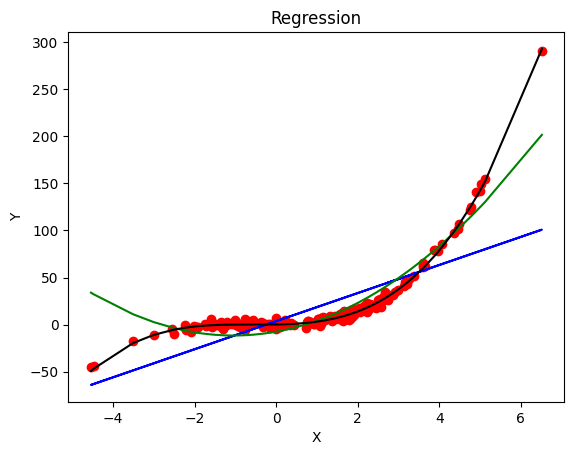

In [12]:
plt.scatter(X_val, y_val, color='red')
plt.plot(X_val, lin_reg_1.predict(X_val), color='blue')

x2,y2 = zip(*sorted(zip(X_val, lin_reg_2.predict(X_poly_val2)),key=lambda x: x[0]))
plt.plot(x2, y2, color='green')

x3,y3 = zip(*sorted(zip(X_val, lin_reg_3.predict(X_poly_val3)),key=lambda x: x[0]))
plt.plot(x3, y3, color='black')

plt.title("Regression")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()